In [0]:
import cv2
from keras.models import load_model
from keras.applications import VGG16
from PIL import Image

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
modelVGG = VGG16(weights='imagenet', include_top=False)

In [0]:
modelVGG.save("modelVGG.h5")

In [0]:
!cp /content/modelVGG.h5 /content/drive/My\ Drive/modelVGG.h5
!cp /content/drive/My\ Drive/model.h5 /content/model.h5

In [0]:
emotion_dict = {1:"ANGRY", 2:"DISGUST", 3:"FEAR", 4:"HAPPY", 5:"NEUTRAL", 6:"SAD", 7:"SURPRISE"}

In [0]:
!cp /content/drive/My\ Drive/haarcascade_frontalface_default.xml /content/haarcascade_frontalface_default.xml
model = load_model("model.h5")

In [0]:
def predict(path):
  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2.imwrite(path, gray)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  if len(faces) > 0:
    for (x,y,w,h) in faces:
      face_clip = img[y:y+h, x:x+w]
      cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
  else:
    cv2.imwrite(path, cv2.resize(img, (350, 350)))
  read_image = cv2.imread(path)
  read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
  read_image_final = read_image/255.0
  VGG_Pred = modelVGG.predict(read_image_final)
  VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
  top_pred = model.predict(VGG_Pred)
  emotion_label = top_pred[0].argmax() + 1
  print("Predicted Expression Probabilities")
  print("ANGRY: {}\nDISGUST: {}\nFEAR: {}\nHAPPY: {}\nNEUTRAL: {}\nSAD: {}\nSURPRISE: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6]))

In [0]:
!cp /content/drive/My\ Drive/happy.jpg /content/happy.jpg

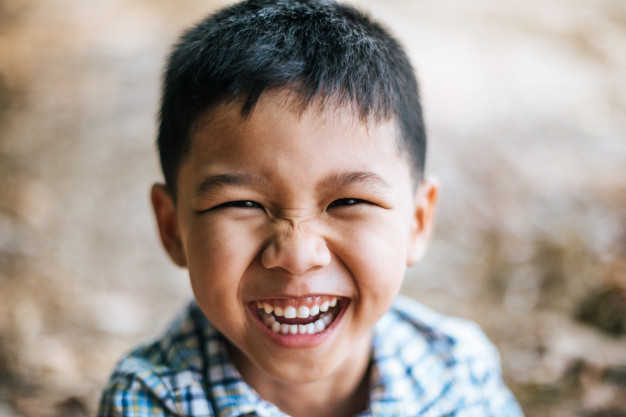

In [0]:
Image.open("/content/happy.jpg")

In [0]:
predict("/content/happy.jpg")

Predicted Expression Probabilities
ANGRY: 0.3932855427265167
DISGUST: 0.0013353786198422313
FEAR: 0.0023230300284922123
HAPPY: 0.43380406498908997
NEUTRAL: 0.09192121028900146
SAD: 0.07018467038869858
SURPRISE: 0.007146038580685854




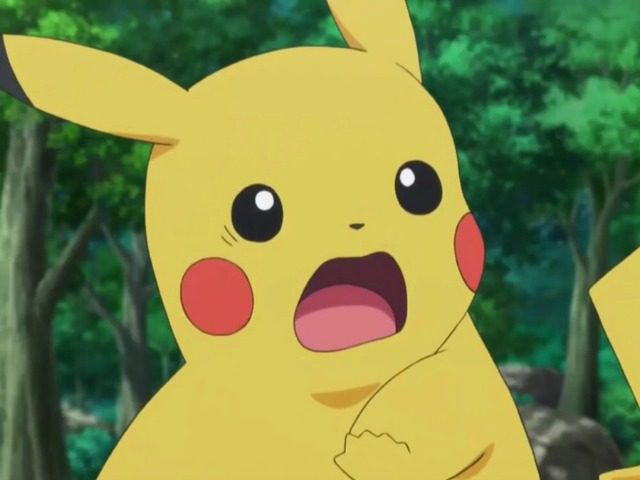

In [0]:
!cp /content/drive/My\ Drive/surprise.jpg /content/surprise.jpg
Image.open("/content/surprise.jpg")

In [0]:
predict("/content/surprise.jpg")

Predicted Expression Probabilities
ANGRY: 1.8177341871705721e-06
DISGUST: 1.3342824622952776e-09
FEAR: 4.0453284100294695e-07
HAPPY: 0.0002675634459592402
NEUTRAL: 0.00834138784557581
SAD: 7.431346602970734e-06
SURPRISE: 0.9913813471794128


